# 0.0 Imports

In [84]:
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import tree as tr
from sklearn import ensemble as en
from sklearn import metrics as mt

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

# 1.0 Load Dataset

In [2]:
X, y = ds.make_classification(n_samples=1000, n_classes=2, random_state=0)

In [4]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

Por padrão o dataset criando usando a função `make_classification()` possui 20 features.

In [5]:
X_train.shape

(800, 20)

In [6]:
X_test.shape

(200, 20)

In [11]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0])

# 2.0 Model training

In [12]:
# definition
model = en.RandomForestClassifier(
    
    n_estimators=100,       # número de árvores que compõem a random forest
    max_depth=2,            # profundidade máxima de cada árvore
    random_state=0
)

# fit (training)
model.fit(X_train, y_train)

# performance
yhat_test = model.predict_proba(X_test)  # retorna a probabilidade de cada registro pertencer a classe associada

In [14]:
yhat_test[:10]

array([[0.7810462 , 0.2189538 ],
       [0.76514093, 0.23485907],
       [0.20463075, 0.79536925],
       [0.8411655 , 0.1588345 ],
       [0.24567576, 0.75432424],
       [0.34811618, 0.65188382],
       [0.22509947, 0.77490053],
       [0.78839832, 0.21160168],
       [0.21455111, 0.78544889],
       [0.84455048, 0.15544952]])

Para plotarmos a nossa curva ROC vamos selecionar as probabilidade de cada registro do conjunto de teste pertencer a classe 1. Ao selecionarmos essa classe, estamos identificado ela como a classe positiva.

In [15]:
yhat_test = yhat_test[:,1]  # Seleciona a probabilidade de cada registro pertencer a classe 1

In [16]:
yhat_test[:10]

array([0.2189538 , 0.23485907, 0.79536925, 0.1588345 , 0.75432424,
       0.65188382, 0.77490053, 0.21160168, 0.78544889, 0.15544952])

# 3.0 ROC curve

In [18]:
fpr, tpr, th = mt.roc_curve(y_test, yhat_test)

False Positive Rate = $\frac{\#FP}{\#FP + \#TN}$

In [19]:
# false positive rate - representa a taxa de erro da classe negativa
fpr

array([0.        , 0.        , 0.        , 0.01075269, 0.01075269,
       0.02150538, 0.02150538, 0.03225806, 0.03225806, 0.04301075,
       0.04301075, 0.11827957, 0.11827957, 0.17204301, 0.17204301,
       0.66666667, 0.66666667, 1.        ])

True positive rate = $\frac{\#TP}{\#TP + \#FN}$

In [20]:
# true positive rate - representa a taxa de acerto da classe positiva
tpr

array([0.        , 0.00934579, 0.05607477, 0.05607477, 0.41121495,
       0.41121495, 0.82242991, 0.82242991, 0.8411215 , 0.8411215 ,
       0.97196262, 0.97196262, 0.98130841, 0.98130841, 0.99065421,
       0.99065421, 1.        , 1.        ])

In [21]:
# thresholds - probabilidade mínima que um registro precisa alcançar para ser classificado como classe positiva
th

array([1.80592261, 0.80592261, 0.79753988, 0.79649174, 0.77860363,
       0.77755838, 0.70372075, 0.70035804, 0.69547763, 0.69254117,
       0.57382805, 0.32097773, 0.31947889, 0.26915622, 0.2617487 ,
       0.20076823, 0.19715288, 0.14637605])

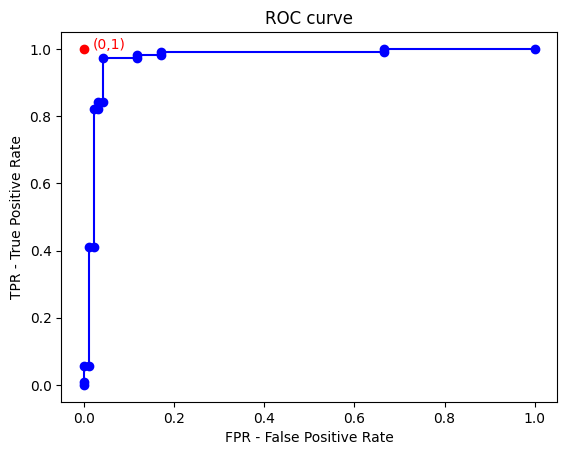

In [30]:
plt.plot(fpr, tpr, color='b', marker='o')

plt.scatter(x=0, y=1, color='r')             # valores de fpr e tpr que um classificador perfeito teria
plt.text(x=0.02, y=1, s='(0,1)', color='r')

plt.title('ROC curve')
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')

plt.show()

Vemos que para esse conjunto de dados, a random forest é considerado um bom classificador, pois obtemos uma curva em formato de "L" invertido que se aproxima bastante do ponto ideal.

# 4.0 Repetindo o Treinamento para um novo conjunto

Vamos ver agora como se comporta a random forest e a ROC curve quando diminuímos o número de features do dataset de 20 para 8, das quais 3 são redundantes.

In [70]:
X, y = ds.make_classification(
    
    n_samples=1000,
    n_classes=2,
    n_features=8,
    n_redundant=3,
    random_state=0
)

Vamos retreinar o modelo de Random Forest utilizando apenas 3 árvores (`n_estimators=3`).

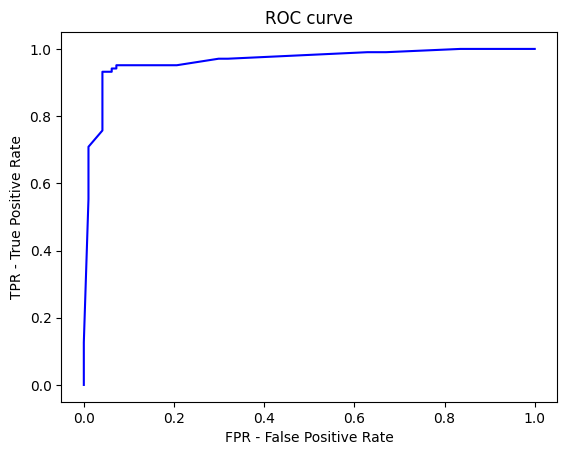

In [71]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

# definition
model = en.RandomForestClassifier(
    n_estimators=3,
    max_depth=3,
    random_state=0
)

# fit
model.fit(X_train, y_train)


# peformance
yhat_test = model.predict_proba(X_test)
yhat_test = yhat_test[:, 1]

fpr, tpr, th = mt.roc_curve(y_test, yhat_test)

# roc curve plot
plt.plot(fpr, tpr, color='b')

plt.title('ROC curve')
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')

plt.show()

Para determinarmos o melhor valor de threshold do classificador (aquele que gera o par (fpr, tpr) mais próximo de $(0,1)$ ) usamos a fórmula da distância entre 2 pontos.

$d_{(0,1)\;\rightarrow\;(fpr, \;tpr)} = \sqrt{(0 - fpr)^{2} + (1 - tpr)^{2}}$

O melhor valor de threshold é aquele que gera o par (fpr, tpr) que resulta no menor valor de $d_{(0,1)\;\rightarrow\;(fpr, \;tpr)}$.

In [72]:
distances = np.sqrt((0 - fpr)**2 + (1 - tpr)**2)
distances

array([1.        , 0.98058252, 0.97087379, 0.87378641, 0.44672091,
       0.417603  , 0.39819173, 0.29144453, 0.24619656, 0.15135689,
       0.09662053, 0.07949352, 0.09189583, 0.08496746, 0.09274225,
       0.08697281, 0.13289464, 0.1620795 , 0.18185643, 0.20180191,
       0.21182299, 0.30038449, 0.32091212, 0.62894092, 0.67017342,
       0.83505155, 0.87628866, 0.96907216, 1.        ])

In [73]:
# menor distância entre (0,1) e (fpr, tpr)
distances.min()

0.07949351845584583

In [74]:
index_min = np.argmin(distances)  # encontra o indice do menor valor em uma array

best_threshold = th[index_min]    # o melhor threshold é aquele na mesma posição que minimiza a distância

print(f'O threshold que resulta na melhor performance é: tr = {best_threshold}')

O threshold que resulta na melhor performance é: tr = 0.6196308077887026


Vamos agora avaliar a acurácia que o modelo obtém usando o melhor valor de threshold.

In [75]:
# ao utilizarmos um operador relacional em uma array, obtemos uma nova array de valores booleanos
yhat_test >= best_threshold

array([False,  True,  True, False,  True, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False,  True,
        True, False,  True, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
       False, False,  True, False, False,  True,  True,  True, False,
        True, False, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True, False, False, False,
       False,  True,

In [76]:
# convert a array de valores booleanos em inteiros seguinte: (True -> 1) e (False -> 0)
# portanto os valores que não são maiores que o best_threshold (False) são designado à classe 0
yhat_test_best = (yhat_test >= best_threshold).astype(int)

# avalia a acurácia nos valores preditos pelo modelo usando o melhor threshold
acc = mt.accuracy_score(y_test, yhat_test_best)

print(f'Best Threshold: {best_threshold}')
print(f'Accuracy: {acc}')

Best Threshold: 0.6196308077887026
Accuracy: 0.945


Depois de treinada a Random Forest possuí um atributo chamado `feature_importances_` que pondera qual foi a importância ou o peso de cada feature durante o treinamento.

In [77]:
model.feature_importances_

array([0.06616119, 0.72219705, 0.        , 0.0209795 , 0.00540036,
       0.04195749, 0.00364714, 0.13965727])

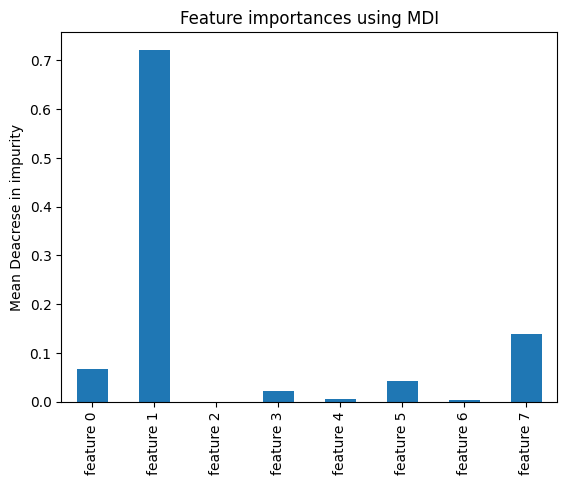

In [93]:
feature_names = [ f'feature {i}' for i in range(X.shape[1]) ]
importances = model.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()

forest_importances.plot.bar(ax=ax)

ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean Deacrese in Impurity')

plt.show()

A importância de uma feature é determinada através do Mean Impurity Decrease.

Nesse nosso exemplo estamos utilizando uma Random Forest com 3 árvores (`n_estimators=3`) sendo que cada árvore possui uma profundidade máxima de 3 (`max_depth`). Como temos 8 features ao todo no nosso dataset original, o algoritmo de random forest selecionará 3 features ($N_{Search\;Space} = \sqrt{N_{Features}} \approx 3$) para o Search Space após o bootstrap de cada árvore.

Dessa forma, uma possível combinação da Random Forest seria:



**DT01**  -> Decrease Impurity
* Feature 0 = 0.18
* Feature 1 = 0.61
* Feature 7 = 0.35


**DT02**
* Feature 1 = 0.80
* Feature 2 = 0.01
* Feature 7 = 0.11


**DT03**
* Feature 0 = 0.08
* Feature 1 = 0.75
* Feature 2 = 0.02


Nesse caso a Feature 1 foi utilizada nas 3 árvores de decisão que formam a Random Forest e o decréscimo médio da impureza que essa feature causou foi:

$MDI_{Feature\_1} = \frac{0.61 + 0.80 + 0.75}{3} = 0.72$


O valor obtido pelo atributo `feature_importance_` é a média da queda da impureza das features obtida pelas árvores que compõem a Random Forest.

**A Random Forest consegue determinar quais são as variáveis mais importantes em um determinado fenômeno.**